In [1]:
# import necessary packages
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
# read in dataframe from saved csv which has been preprocessed
df=pd.read_csv('../supporting/preprocessed_df.csv', index_col= 0)
print(df.columns)

Index(['cik', 'ticker', 'name', 'date', 'shares', 'netincome', 'revenue', 'pe',
       'close', 'revenue growth for previous 2 years',
       'income growth for previous 2 years',
       'price growth for previous 2 years', 'price growth for next 2 years',
       'revtimesincome', 'revplusincome', 'revtimesrev', 'inctimesinc',
       'pricetimesrev', 'priceplusrev', 'priceplusrevplusinc',
       'inctimestimesrev'],
      dtype='object')


In [3]:
# define training variables
x= ['shares', 'netincome', 'revenue', 'pe',
    'close', 'revenue growth for previous 2 years',
    'income growth for previous 2 years',
    'price growth for previous 2 years',
    'revtimesincome', 'revplusincome', 'revtimesrev', 'inctimesinc',
    'pricetimesrev', 'priceplusrev', 'priceplusrevplusinc',
    'inctimestimesrev']

y= 'price growth for next 2 years'

#throw out outliers
for i in x:
    df=df[df[i].between(df[i].quantile(.005),df[i].quantile(.995))]

# get training data for x
x_train = df[x].values

# get training data for y
y_train = df[y].values

print(x_train[:2],y_train[:2])

[[ 1.86000000e+08  2.50000000e+08  1.34030000e+10  4.41442953e-01
   3.18099995e+01  1.99000000e-01 -5.30000000e-02  4.80000000e-02
  -1.05470000e-02  1.46000000e-01  3.96010000e-02 -2.80900000e-03
   9.55200000e-03  2.47000000e-01  1.94000000e-01 -1.11239209e-04]
 [ 1.85000000e+08 -1.12500000e+09  1.04330000e+10  3.60850194e-01
   2.03500004e+01 -5.40000000e-02 -5.30000000e-02 -3.00000000e-01
   2.86200000e-03 -1.07000000e-01 -2.91600000e-03 -2.80900000e-03
  -1.62000000e-02 -3.54000000e-01 -4.07000000e-01 -8.19104400e-06]] [0.21  0.512]


In [4]:
# scale x training data to same scale
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[1.05277778e+10 2.33358000e+10 1.56989385e+11 3.35434192e+01
 5.80659976e+02 6.84000000e-01 1.87600000e+00 1.16300000e+00
 3.37418000e-01 2.06400000e+00 2.63696000e-01 1.99498600e+00
 2.22444000e-01 1.23900000e+00 2.28100000e+00 5.83379783e-02]
Peak to Peak range by column in Normalized X:[11.06773802 10.56539605  8.32503983 11.12839574 10.23265245  6.89326116
  6.3136754   6.21912306  8.87218776  6.18314985  9.67603037  9.42341746
  8.89079586  5.40222468  5.38395216 11.29465527]


In [5]:
# run linear regression on data
sgdr = SGDRegressor(early_stopping=False, learning_rate='optimal', max_iter=10000,
             n_iter_no_change=1000)
sgdr.fit(x_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
# print model parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

SGDRegressor(learning_rate='optimal', max_iter=10000, n_iter_no_change=1000)
number of iterations completed: 1126, number of weight updates: 6083779.0
model parameters:                   w: [ 0.00288252 -0.00519985  0.00732634 -0.00850472  0.01077672  0.02362536
  0.0057898  -0.00129599  0.02826675  0.01208641 -0.01894133 -0.00604024
  0.01452352  0.00906298  0.00894115  0.00938077], b:[0.13434885]


Prediction on training set:
[0.12812109 0.04958867 0.08591745 0.11022015]
Target values 
[ 0.21   0.512 -0.336 -0.215]


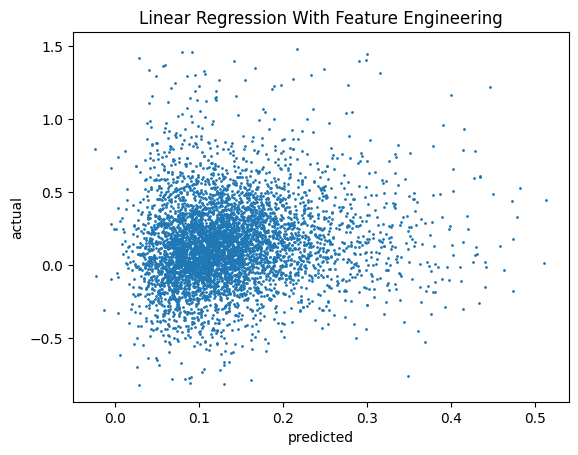

In [8]:
# make a prediction 
y_pred = sgdr.predict(x_norm)

# plot predicted vs actual
# ideally this would be close to a line
plt.scatter(y_pred, y_train, s=1)
plt.title('Linear Regression With Feature Engineering')
plt.xlabel('predicted')
plt.ylabel('actual')


print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

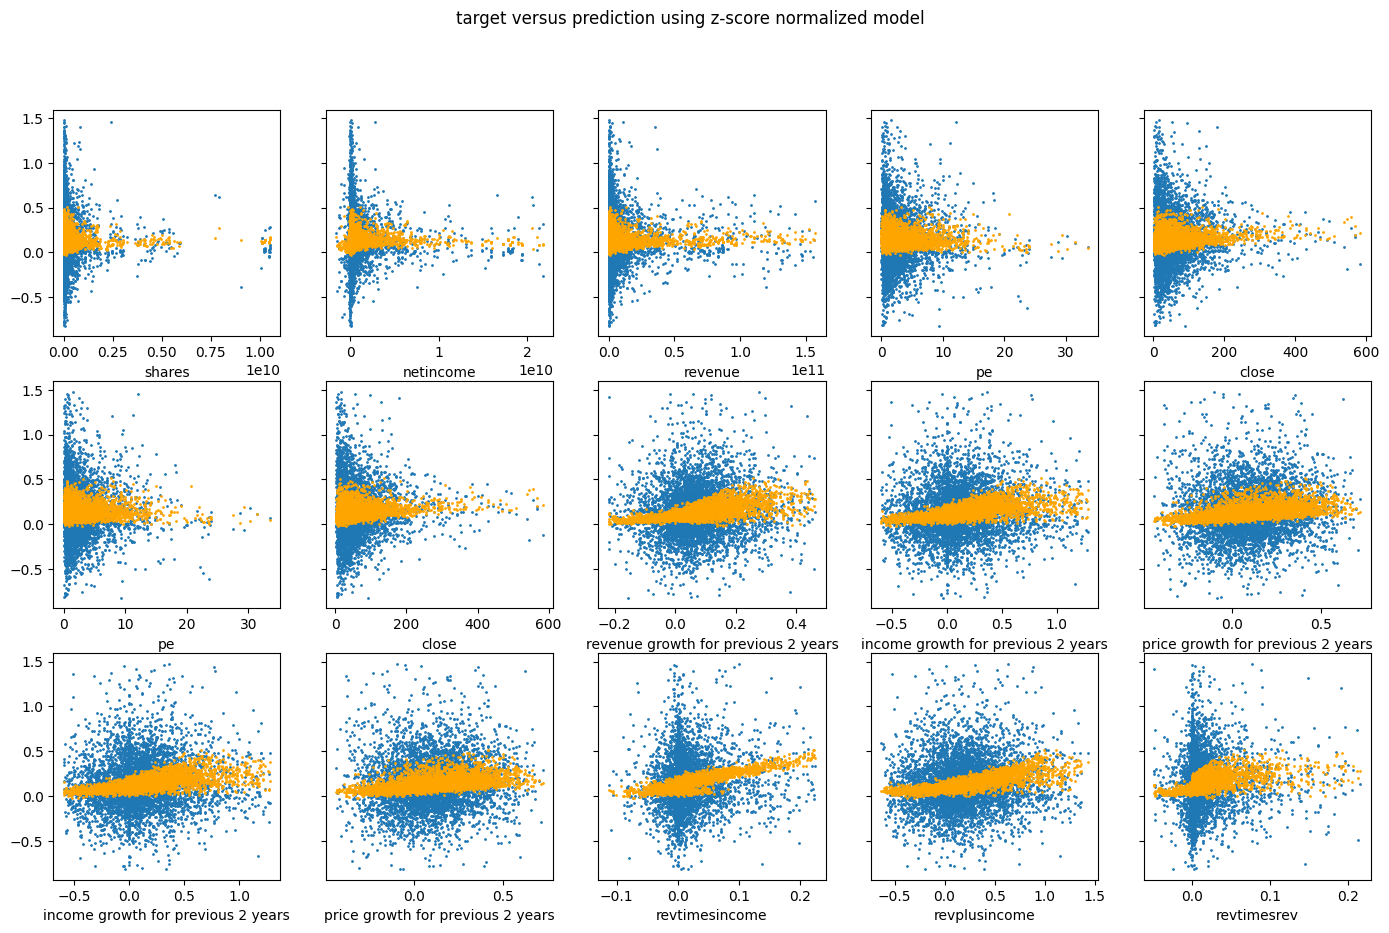

In [7]:
# plot predictions and targets vs original features
numrows=3
numcols=int(len(x)/3)  
fig,ax=plt.subplots(numrows,numcols,figsize=(17,10),sharey=True)
for j in range(numrows):
    for i in range(numcols):
        index=j*numrows+i
        # print(index)
        ax[j][i].scatter(x_train[:,index],y_train, label = 'target',s=1)
        ax[j][i].set_xlabel(x[index])
        ax[j][i].scatter(x_train[:,index],y_pred,color='orange', label = 'predict', s=1)
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()